In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
import matplotlib as mpl
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd

In [2]:
#model data
df=pd.read_csv('ex/data/days-simulated-v2.tsv')

In [3]:
#target structure: activity, duration, activity, duration, ...
df.head()

,day
0,"0,270,5,32,10,73,16,25,5,165,2,35,4,300,1,53,1..."
1,"4,150,16,7,4,623,16,5,8,35,16,20,5,30,2,10,8,1..."
2,"0,270,1,75,16,30,9,15,16,5,8,40,16,5,10,10,16,..."
3,"0,240,1,60,10,50,16,5,5,55,2,32,16,8,10,10,16,..."
4,"0,170,2,20,16,5,4,285,2,15,3,205,16,5,6,6,16,1..."


In [4]:
a=df.loc[430].values[0].split(',')

In [5]:
#activity sum duration (minues by day)
sum([int(a[i*2+1]) for i in range(len(a)/2)])

1440

In [6]:
df1=pd.read_csv('ex/1.csv', encoding = 'utf8')
df2=pd.read_csv('ex/2.csv', encoding = 'utf8')
df3=pd.read_csv('ex/3.csv', encoding = 'utf8')

In [7]:
df=pd.concat([df1,df2[1:],df3[1:]]) #no need for headers twice, df headers completely identical

In [8]:
#create weekday dataframe
hkoz=df[df.columns[9:489]].reset_index()

In [9]:
#create weekend dataframe
hetv=df[df.columns[489:969]].reset_index()

In [10]:
#create descriptive stats dataframe
desc=df[df.columns[969:]].reset_index()

In [11]:
#create survey metadata dataframe
time=df[df.columns[2:4]].reset_index()

In [12]:
#top 16 activity groups
activities=[['Alv\xc3\xa1s'],
['Zuhany / Mosd\xc3\xb3'],
['\xc3\x89tkez\xc3\xa9s', '\xc3\x89tterem/Vend\xc3\xa9gl\xc5\x91'],
[u'Munka (irodai)', 'Munka (k\xc3\xa9tkezi)'],
[u'Internet', u'Telefon/Chat/Facebook'],
['V\xc3\xa1s\xc3\xa1rl\xc3\xa1s'],
['Vall\xc3\xa1sgyakorl\xc3\xa1s','\xc3\x96nk\xc3\xa9ntess\xc3\xa9g'],
[u'TV/Film', u'Mozi'],
['Olvas\xc3\xa1s', '\xc3\x9ajs\xc3\xa1g/Keresztrejtv\xc3\xa9ny'],
['H\xc3\xa1zimunka/Gyerekfel\xc3\xbcgyelet'],
['Hivatalos elint\xc3\xa9znival\xc3\xb3k'],
[u'Sport', 'Edz\xc5\x91terem/Sz\xc3\xa9ps\xc3\xa9gszalon'],
['Egy\xc3\xa9b Hobby', 'PC j\xc3\xa1t\xc3\xa9k', 'Kert\xc3\xa9szked\xc3\xa9s/Bark\xc3\xa1csol\xc3\xa1s', 'Rokonl\xc3\xa1togat\xc3\xa1s',  'M\xc3\xa1s'],
['Tanul\xc3\xa1s',  'Mag\xc3\xa1n\xc3\xb3ra'],
['Sz\xc3\xb3rakoz\xc3\xb3hely/K\xc3\xa1v\xc3\xa9z\xc3\xb3/Pub'],
['S\xc3\xa9ta/Kutyas\xc3\xa9t\xc3\xa1ltat\xc3\xa1s', 'Term\xc3\xa9szet/Kir\xc3\xa1ndul\xc3\xa1s'],
['Utaz\xc3\xa1s/Vezet\xc3\xa9s']]

In [13]:
activities=[[u'Alvás'],
[u'Zuhany / Mosdó'],
[u'Étkezés', u'Étterem/Vendéglõ'],
[u'Munka (irodai)', u'Munka (kétkezi)'],
[u'Internet', u'Telefon/Chat/Facebook'],
[u'Vásárlás'],
[u'Vallásgyakorlás', u'Önkéntesség'],
[u'TV/Film', u'Mozi'],
[u'Olvasás', u'Újság/Keresztrejtvény'],
[u'Házimunka/Gyerekfelügyelet'],
[u'Hivatalos elintéznivalók'],
[u'Sport', u'Edzõterem/Szépségszalon'],
[u'Egyéb Hobby',u'PC játék', u'Kertészkedés/Barkácsolás', u'Rokonlátogatás', u'Más'],
[u'Tanulás', u'Magánóra'],
[u'Szórakozóhely/Kávézó/Pub'],
[u'Séta/Kutyasétáltatás', u'Természet/Kirándulás'],
[u'Utazás/Vezetés']]

In [14]:
#bin activities into activity groups
actidict={}
for i in range(len(activities)):
    for j in range(len(activities[i])):
        actidict[activities[i][j]]=i

In [15]:
#binned activities into activity groups
for i in activities:
    for j in i:
        print j,
    print 

Alvás
Zuhany / Mosdó
Étkezés Étterem/Vendéglõ
Munka (irodai) Munka (kétkezi)
Internet Telefon/Chat/Facebook
Vásárlás
Vallásgyakorlás Önkéntesség
TV/Film Mozi
Olvasás Újság/Keresztrejtvény
Házimunka/Gyerekfelügyelet
Hivatalos elintéznivalók
Sport Edzõterem/Szépségszalon
Egyéb Hobby PC játék Kertészkedés/Barkácsolás Rokonlátogatás Más
Tanulás Magánóra
Szórakozóhely/Kávézó/Pub
Séta/Kutyasétáltatás Természet/Kirándulás
Utazás/Vezetés


In [16]:
timekeys=['01:00-02:30', '02:30-04:00', '04:00-05:30', '05:30-07:00',
       '07:00-08:30', '08:30-10:00', '10:00-11:30', '11:30-13:00',
       '13:00-14:30', '14:30-16:00', '16:00-17:30', '17:30-19:00',
       '19:00-20:30', '20:30-22:00', '22:00-23:30', '23:30-01:00']

In [17]:
# run only once
hkoz.columns=hkoz.loc[0].values
hkoz=hkoz[1:].drop(0,axis=1)
hetv.columns=hetv.loc[0].values
hetv=hetv[1:].drop(0,axis=1)

In [18]:
#extract and linearize data from pandas dataframe
hkozdata={}
for i in hkoz.index:
    index=hkoz.loc[i].index
    values=hkoz.loc[i].values
    helper=[]
    for j in range(len(values)):
        if str(values[j]).lower()!='nan':
            helper.append(index[j])
    hkozdata[i]=helper                

In [19]:
#extract and linearize data from pandas dataframe
hetvdata={}
for i in hetv.index:
    index=hetv.loc[i].index
    values=hetv.loc[i].values
    helper=[]
    for j in range(len(values)):
        if str(values[j]).lower()!='nan':
            helper.append(index[j])
    hetvdata[i]=helper                

In [20]:
#create timematrix - timeslice:activity list
j=1
timematrix={}
for i in hkozdata[j]:
    activity=i[:i.find('-')-1]
    timeslice=i[i.find('-')+2:]
    if timeslice not in timematrix:timematrix[timeslice]=[]
    timematrix[timeslice].append(actidict[activity])

In [21]:
#create correct timeslice order to start day at 04:00
parseorder=np.roll(np.sort(timematrix.keys()),-2)

In [22]:
#create output list, with shared timeslots
output=[]
for k in range(len(parseorder)):
    helper=timematrix[parseorder[k]]
    np.random.shuffle(helper)
    output.append(helper[:3]) #max 3 activities within 90 minutes, but create 3 randomized persons

In [23]:
print output

[[0], [0, 1], [13], [13], [13, 2], [13], [13], [13], [7, 4, 12], [13], [13], [7, 2, 4], [0], [0], [0], [0]]


In [24]:
#create output CSV list: activity, duration, activity, duration, ...
output2=[]
fixed=90 # survey 90 min timeslices are fixed
for k in range(len(output)):
    for z in range(len(output[k])):
        output2.append(output[k][z])
        output2.append(fixed/(len(output[k])))
print output2

[0, 90, 0, 45, 1, 45, 13, 90, 13, 90, 13, 45, 2, 45, 13, 90, 13, 90, 13, 90, 7, 30, 4, 30, 12, 30, 13, 90, 13, 90, 7, 30, 2, 30, 4, 30, 0, 90, 0, 90, 0, 90, 0, 90]


In [25]:
#minutes in perfect day
sum([output2[i*2+1] for i in range(len(output2)/2)])

1440

In [26]:
#create output CSV list: activity, duration, activity, duration, ... including pruning
output2=[]
fixed=90 # survey 90 min timeslices are fixed
current=999
for k in range(len(output)):
    for z in range(len(output[k])):
        if output[k][z]!=current:
            current=output[k][z]
            output2.append(output[k][z])
            output2.append(fixed/(len(output[k]))-10+int(np.random.uniform(20))) #randomize a bit better movement
        else:
            output2[-1]+=fixed/(len(output[k]))        
print output2

[0, 135, 1, 48, 13, 233, 2, 41, 13, 270, 7, 31, 4, 32, 12, 28, 13, 174, 7, 37, 2, 38, 4, 29, 0, 362]


In [27]:
sum([output2[i*2+1] for i in range(len(output2)/2)])

1458

Parse all data

In [29]:
instances=3
rrange=21

In [30]:
#fill method 1:
#assume sleeping if notehing clicked in
#fill method 2:
#disregard incomplete data

In [31]:
#create timematrix - timeslice:activity list
output4=[]
for j in hkozdata:
    timematrix={}
    for i in hkozdata[j]:
        activity=i[:i.find('-')-1]
        timeslice=i[i.find('-')+2:]
        if timeslice not in timematrix:timematrix[timeslice]=[]
        timematrix[timeslice].append(actidict[activity])
    
    #fill up with sleep
    if len(timematrix)<16:
        for t in timekeys:
            if t not in timematrix:
                timematrix[t]=[0]                    
                
    #create correct timeslice order to start day at 04:00
    parseorder=np.roll(np.sort(timematrix.keys()),-2)
    #create output list, with shared timeslots
    for x in range(instances): #create 3 randomized person-instances
        output=[]
        for k in range(len(parseorder)):
            helper=timematrix[parseorder[k]]
            np.random.shuffle(helper)
            output.append(helper[:3]) #max 3 activities within 90 minutes, but create 3 randomized persons
        #create output CSV list: activity, duration, activity, duration, ...
        output2=[]
        fixed=90 # survey 90 min timeslices are fixed
        current=999
        for k in range(len(output)):
            for z in range(len(output[k])):
                if output[k][z]!=current:
                    current=output[k][z]
                    output2.append(output[k][z])
                    output2.append(int(fixed*1.0/(len(output[k]))))
                else:
                    output2[-1]+=fixed/(len(output[k])) 

        output4.append(str(output2)[1:-1].replace(' ',''))

In [32]:
output4b=[]
for j in range(len(output4)):
    a=[int(i) for i in output4[j].split(',')]
    b=[int(np.random.uniform(rrange)) for k in range(len(a)/2-1)]
    for g in range(len(b)):
        toshift=int(min(min(a[g*2+1],a[(g+1)*2+1])/1.6,b[g]))
        a[g*2+1]+=toshift
        a[(g+1)*2+1]-=toshift
    output4b.append(str(a)[1:-1].replace(' ',''))

In [33]:
savedata=pd.DataFrame(output4b)
savedata.columns=['day']

In [34]:
savedata.to_csv('hkoz3.csv',index=False)

In [35]:
#create timematrix - timeslice:activity list
output5=[]
for j in hetvdata:
    timematrix={}
    for i in hetvdata[j]:
        activity=i[:i.find('-')-1]
        timeslice=i[i.find('-')+2:]
        if timeslice not in timematrix:timematrix[timeslice]=[]
        timematrix[timeslice].append(actidict[activity])
        
    #fill up with sleep
    if len(timematrix)<16:
        for t in timekeys:
            if t not in timematrix:
                timematrix[t]=[0]                    
    
    #create correct timeslice order to start day at 04:00
    parseorder=np.roll(np.sort(timematrix.keys()),-2)
    #create output list, with shared timeslots
    for x in range(instances): #create 3 randomized person-instances
        output=[]
        for k in range(len(parseorder)):
            helper=timematrix[parseorder[k]]
            np.random.shuffle(helper)
            output.append(helper[:3]) #max 3 activities within 90 minutes, but create 3 randomized persons
        #create output CSV list: activity, duration, activity, duration, ...
        output2=[]
        fixed=90 # survey 90 min timeslices are fixed
        current=999
        for k in range(len(output)):
            for z in range(len(output[k])):
                if output[k][z]!=current:
                    current=output[k][z]
                    output2.append(output[k][z])
                    output2.append(int(fixed*1.0/(len(output[k]))))
                else:
                    output2[-1]+=fixed/(len(output[k])) 
        output5.append(str(output2)[1:-1].replace(' ',''))

In [36]:
output5b=[]
for j in range(len(output5)):
    a=[int(i) for i in output5[j].split(',')]
    b=[int(np.random.uniform(rrange)) for k in range(len(a)/2-1)]
    for g in range(len(b)):
        toshift=int(min(min(a[g*2+1],a[(g+1)*2+1])/1.6,b[g]))
        a[g*2+1]+=toshift
        a[(g+1)*2+1]-=toshift
    output5b.append(str(a)[1:-1].replace(' ',''))

In [37]:
savedata=pd.DataFrame(output5b)
savedata.columns=['day']

In [38]:
savedata.to_csv('hetv3.csv',index=False)

In [39]:
len(savedata)

798

Plots

In [40]:
colorsdict={
"0": "#e0d400",
"1": "#1c8af9",
"2": "#51BC05",
"3": "#FF7F00",
"4": "#DB32A4",
"5": "#00CDF8",
"6": "#E63B60",
"7": "#8E5649",
"8": "#68c99e",
"9": "#a477c8",
"10": "#5C76EC",
"11": "#E773C3",
"12": "#799fd2",
"13": "#038a6c",
"14": "#cc87fa",
"15": "#ee8e76",
"16": "#bbbbbb",
}
colors=[colorsdict[str(i)] for i in range(len(colorsdict))]

In [41]:
act_codes = [
{"index": "15", "short": u"Kutya", "desc": u"Sétáltatás | Természet"},
{"index": "3", "short": u"Meló", "desc": u"Munka (irodai | kétkezi)"},
{"index": "7", "short": u"TV", "desc": u"TV | Film | Mozi"},
{"index": "5", "short": u"Vásárlás", "desc": u"Vásárlás | Mall"},
{"index": "6", "short": u"Áhítat", "desc": u"Vallásgyakorlás | Önkéntesség"},
{"index": "4", "short": u"Net", "desc": u"Internet | Telefon | Facebook"},
{"index": "1", "short": u"Zuhany", "desc": u"Zuhany | Mosdó"},
{"index": "8", "short": u"Olvasás", "desc": u"Könyv | Újság | Keresztrejtvény"},
{"index": "9", "short": u"Otthon", "desc": u"Házimunka | Gyerekfelügyelet"},
{"index": "0", "short": u"Szundi", "desc": u"Alvás"},
{"index": "11", "short": u"Sport", "desc": u"Edzés | Edzőterem | Szaladás"},
{"index": "12", "short": u"Hobby", "desc": u"Kertészkedés | Barkácsolás | Rokonok"},
{"index": "2", "short": u"Kaja", "desc": u"Étkezés | Étterem"},
{"index": "14", "short": u"Sör", "desc": u"Kávézó | Pub | Szórakozóhely"},
{"index": "13", "short": u"Suli", "desc": u"Tanulás | Magánóra"},
{"index": "10", "short": u"Hivatal", "desc": u"Hivatalos elintéznivalók"},
{"index": "16", "short": u"Úton", "desc": u"Utazás | Vezetés"},
]
labels={i['index']:i['short'] for i in act_codes}

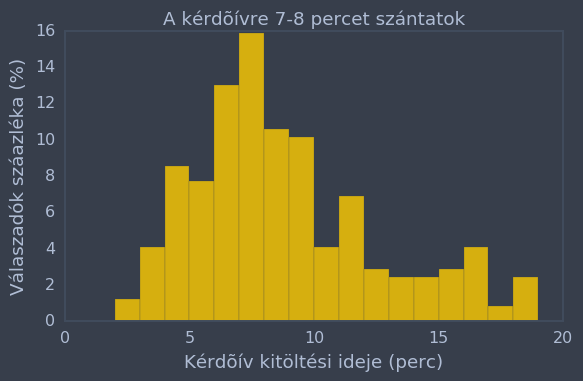

In [42]:
#duration
time['sd']=pd.to_datetime(time['Start Date'])
time['ed']=pd.to_datetime(time['End Date'])
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.hist([(time['ed'].sub(time['sd'], axis=0))[1:][i].total_seconds()/60.0 for i in range(1,len(time))],
         range=[0,20],bins=range(20),normed=True,color='#ffcc00',alpha=0.8)
plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Válaszadók száazléka (%)")
plt.title(u"A kérdõívre 7-8 percet szántatok")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
fig.tight_layout()
plt.savefig('1c.png')
plt.show()

In [43]:
mdata=[]
mlen=[]
for k in range(len(output4b)):
    z=np.array(output4b[k].split(',')).astype(int)
    data=[]
    for i in range(len(z)/2):
        for j in range(z[i*2+1]):
            data.append(z[i*2])
    mdata.append(data)
    mlen.append(len(data))
print np.average(mlen)
df=pd.DataFrame(mdata)
histdata=[]
for i in range(len(df.columns)):
    a=np.histogram(df[df.columns[i]],bins=17,range=[-0.5,16.5],normed=True)
    histdata.append(a[0])
df=pd.rolling_mean(pd.DataFrame(histdata),2*rrange,center=True)

df1=df.T
df1[0]=pd.DataFrame(pd.DataFrame(histdata).loc[0])
df1[df1.columns[-1]]=pd.DataFrame(pd.DataFrame(histdata).loc[0])
df2=df1.T.interpolate()

1440.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=42,center=True).mean()


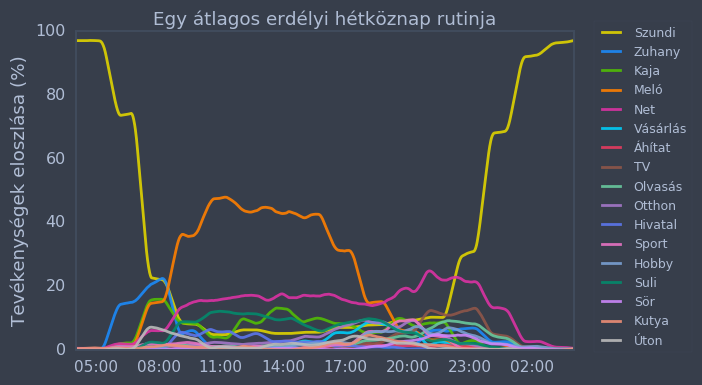

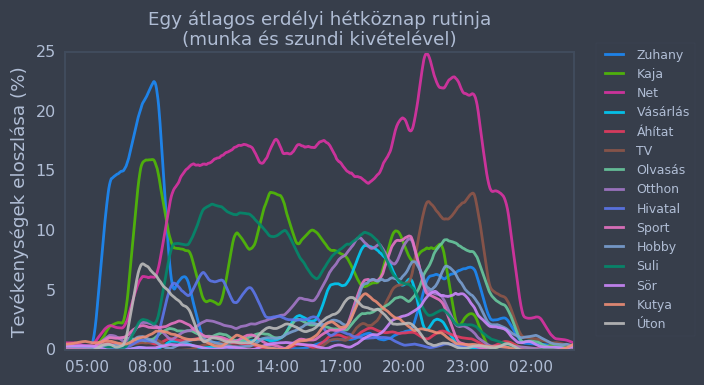

In [44]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
for i in df2.columns:
    plt.plot(df2[i],label=labels[str(i)],color=colors[i],alpha=0.9,lw=2)
plt.xlim(0,1440)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétköznap rutinja")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend(bbox_to_anchor=(1.25, 1.05),fontsize=9)
fig.tight_layout()
plt.savefig('2ac.png')
plt.show()

fig,ax=plt.subplots(1,1,figsize=(6,4))
for i in df2.columns:
    if i not in [0,3]:
        plt.plot(df2[i],label=labels[str(i)],color=colors[i],alpha=0.9,lw=2)
plt.xlim(0,1440)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétköznap rutinja\n(munka és szundi kivételével)")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend(bbox_to_anchor=(1.25, 1.05),fontsize=9)
fig.tight_layout()
plt.savefig('2bc.png')
plt.show()

In [45]:
df2.to_csv('hkoz2c.csv')

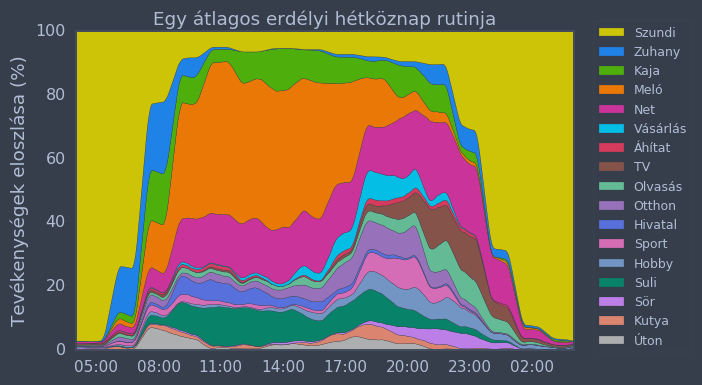

In [46]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
toplot=[]
tolabel=[]
for i in df2.columns[::-1]:
    toplot.append(df2[i])
    tolabel.append(labels[str(i)])
plt.stackplot(df.index,toplot,colors=colors[::-1],alpha=0.9,labels=tolabel)
plt.xlim(0,1440)
plt.ylim(0,1)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétköznap rutinja")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend()
#reverse legend order
handles, labls = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labls[::-1], bbox_to_anchor=(1.25, 1.05),fontsize=9)
fig.tight_layout()
plt.savefig('3c.png')
plt.show()

In [47]:
mdata=[]
mlen=[]
for k in range(len(output5b)):
    z=np.array(output5b[k].split(',')).astype(int)
    data=[]
    for i in range(len(z)/2):
        for j in range(z[i*2+1]):
            data.append(z[i*2])
    mdata.append(data)
    mlen.append(len(data))
print np.average(mlen)
df=pd.DataFrame(mdata)
histdata=[]
for i in range(len(df.columns)):
    a=np.histogram(df[df.columns[i]],bins=17,range=[-0.5,16.5],normed=True)
    histdata.append(a[0])
df=pd.rolling_mean(pd.DataFrame(histdata),2*rrange,center=True)

df1=df.T
df1[0]=pd.DataFrame(pd.DataFrame(histdata).loc[0])
df1[df1.columns[-1]]=pd.DataFrame(pd.DataFrame(histdata).loc[0])
df2=df1.T.interpolate()

1440.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=42,center=True).mean()


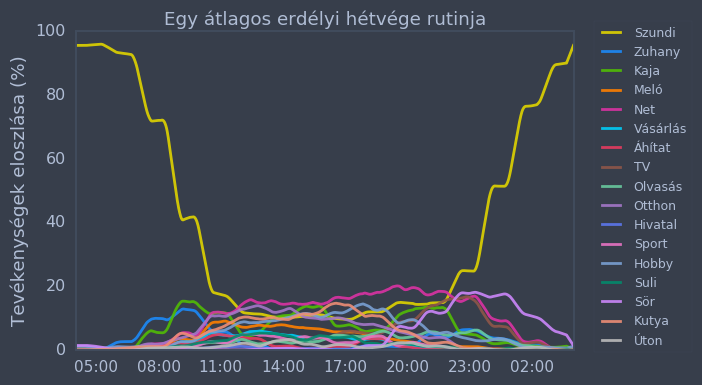

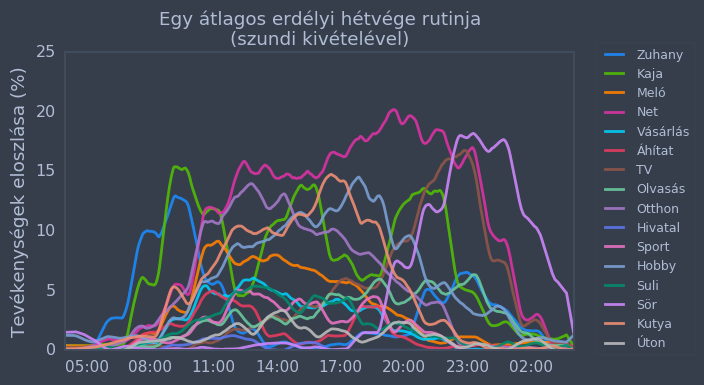

In [48]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
for i in df2.columns:
    plt.plot(df2[i],label=labels[str(i)],color=colors[i],alpha=0.9,lw=2)
plt.xlim(0,1440)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétvége rutinja")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend(bbox_to_anchor=(1.25, 1.05),fontsize=9)
fig.tight_layout()
plt.savefig('4ac.png')
plt.show()

jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
for i in df2.columns:
    if i!=0:
        plt.plot(df2[i],label=labels[str(i)],color=colors[i],alpha=0.9,lw=2)
plt.xlim(0,1440)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétvége rutinja\n(szundi kivételével)")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend(bbox_to_anchor=(1.25, 1.05),fontsize=9)
fig.tight_layout()
plt.savefig('4bc.png')
plt.show()

In [49]:
df2.to_csv('hetv2c.csv')

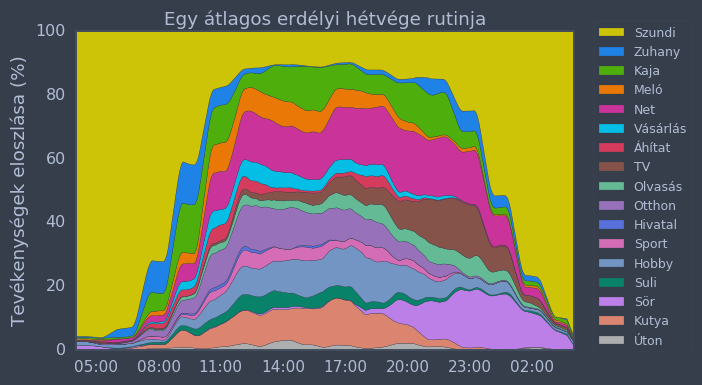

In [50]:
jtplot.style(theme='onedork',fscale=1.1, spines=False, grid=False, )
fig,ax=plt.subplots(1,1,figsize=(6,4))
toplot=[]
tolabel=[]
for i in df2.columns[::-1]:
    toplot.append(df2[i])
    tolabel.append(labels[str(i)])
plt.stackplot(df2.index,toplot,colors=colors[::-1],alpha=0.9,labels=tolabel)
plt.xlim(0,1440)
plt.ylim(0,1)
ax.set_xticks([60,240,420,600,780,960,1140,1320])
ax.set_xticklabels(["05:00","08:00","11:00","14:00","17:00","20:00","23:00","02:00"],fontsize=11)
#plt.xlabel(u"Kérdõív kitöltési ideje (perc)")
plt.ylabel(u"Tevékenységek eloszlása (%)")
plt.title(u"Egy átlagos erdélyi hétvége rutinja")
def mjrFormatter(x, pos):
    return str(int(x*100))
ax = plt.gca()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(mjrFormatter))
ax.legend()
#reverse legend order
handles, labls = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labls[::-1], bbox_to_anchor=(1.25, 1.05),fontsize=9)
fig.tight_layout()
plt.savefig('5c.png')
plt.show()

In [51]:
desc['one']=1

In [52]:
desc.head()

,index,"Ha MÁS-t is ikszeltél a kérdéseknél, itt leírhatod mire gondoltál (opcionális)",Életkor,Nem,Környezet,Megjegyzések,one
0,0,Open-Ended Response,Response,Response,Response,Open-Ended Response,1
1,1,NaN,18-25,Férfi,Vidék (Románia),NaN,1
2,2,NaN,18-25,Nõ,Vidék (Románia),NaN,1
3,3,NaN,18-25,Nõ,Vidék (Románia),NaN,1
4,4,NaN,25-35,Férfi,Kisváros (Románia),NaN,1


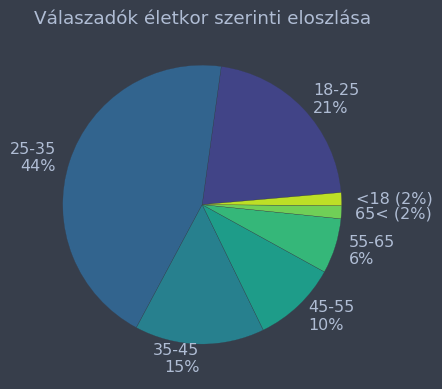

In [54]:
df=desc[1:].groupby(desc.columns[2]).count()
pie=plt.pie(df['index'],labels=df.index,autopct='%1.0f%%')
labels=[pie[1][i].get_text()+'\n'+pie[2][i].get_text() for i in range(len(pie[1]))]
labels[-1]=labels[-1].replace('\n',' (')+')'
labels[-2]=labels[-2].replace('\n',' (')+')'
plt.clf()
cmap = plt.cm.viridis
colors1 = cmap(np.linspace(0.2, 0.9, len(pie[0])))
#np.random.shuffle(colors1)
pie=plt.pie(df['index'],labels=labels,colors=colors1,startangle=5)
ax=plt.gca()
ax.set_aspect('equal')
plt.title(u'Válaszadók életkor szerinti eloszlása')
fig.tight_layout()
plt.savefig('6b.png')
plt.show()

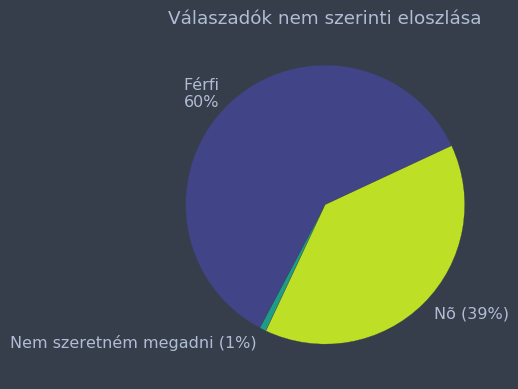

In [55]:
df=desc[1:].groupby(desc.columns[3]).count()
pie=plt.pie(df['index'],labels=df.index,autopct='%1.0f%%')
labels=[pie[1][i].get_text()+'\n'+pie[2][i].get_text() for i in range(len(pie[1]))]
labels[-1]=labels[-1].replace('\n',' (')+')'
labels[-2]=labels[-2].replace('\n',' (')+')'
plt.clf()
cmap = plt.cm.viridis
colors1 = cmap(np.linspace(0.2, 0.9, len(pie[0])))
#np.random.shuffle(colors1)
pie=plt.pie(df['index'],labels=labels,colors=colors1,startangle=25)
ax=plt.gca()
ax.set_aspect('equal')
plt.title(u'Válaszadók nem szerinti eloszlása')
fig.tight_layout()
plt.savefig('7b.png')
plt.show()

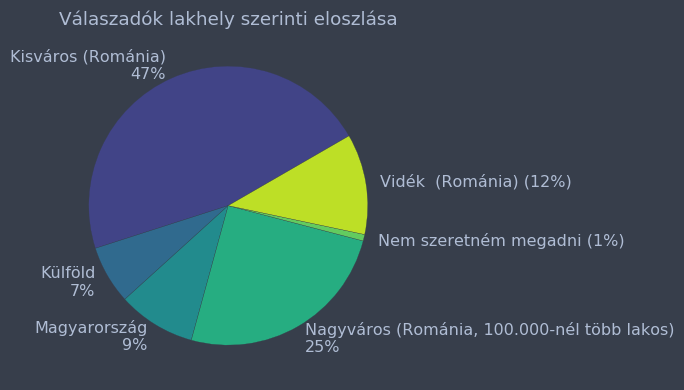

In [56]:
df=desc[1:].groupby(desc.columns[4]).count()
pie=plt.pie(df['index'],labels=df.index,autopct='%1.0f%%')
labels=[pie[1][i].get_text()+'\n'+pie[2][i].get_text() for i in range(len(pie[1]))]
labels[-1]=labels[-1].replace('\n',' (')+')'
labels[-2]=labels[-2].replace('\n',' (')+')'
plt.clf()
cmap = plt.cm.viridis
colors1 = cmap(np.linspace(0.2, 0.9, len(pie[0])))
#np.random.shuffle(colors1)
pie=plt.pie(df['index'],labels=labels,colors=colors1,startangle=30)
ax=plt.gca()
ax.set_aspect('equal')
plt.title(u'Válaszadók lakhely szerinti eloszlása')
fig.tight_layout()
plt.savefig('8b.png')
plt.show()

In [780]:
for i in set(desc[desc.columns[-1]].values):
    print i

nan
Van olyan hogy heti egy -ket alkalom edzes vagy nyelvora,azt nem igazan lehet beilleszteni,mert nem mindennapos.
:)
Open-Ended Response
Egyetemista
Nem vagyok Szekely es nem Romaniaban elek...ha esetleg kizaro lenne a kitoltesnel.
Önkénteskedek is, csak azt nem tudom, azért betáblázni, de heti 2-3 óra időt kb.
Ezt egy nagymama toltotte ki:)
Nagyon vagány, keep it up!
-
A környezet változó lévén,hogy egyetemista vagyok,így a kisváros és nagyváros kategóriák között ingázok.
Túl nagyok az intervallumok, pl. az étkezés vagy a fürdőszoba nem vesz igénybe másfél órát.
vidéken élek, kisvárosban dolgozom
Ennyi
Az a probléma a kérdőívvel, hogy amikor a lista közepénél lennebb vagyunk, akkor nem látszanak a másfél órás periódusok, ezért mindig fel és le kell görgetni. Egyik megoldás talán az lenne, ha a kérdőívek aljára is fel lennének tüntetve az idő közök.
Szerintem a kulturális eseményeken való részvétel (mozin kívül), valamint az emberi kapcsolatok (közösségekben, barátokkal való együttl

In [777]:
for i in set(desc[desc.columns[1]].values):
    print i

nan
Hobbi
festés
Mozi
Open-Ended Response
talalkozunk a baratokkal , de nem szorakozohelyeken csak egyszeruen valakinel otthon.
együttlét barátokkal, közösségekben; kulturális eseményeken: színház, koncert, kiállítások, könyvbemutatók; különféle előadások
Skype-olás a család többi tagjával
színház, koncert, szabadidő, gyermekekkel játszani...
néha kis számítógépes játék, társasjáték, rokonlátogatás, ezaz
Hobby mechatronikai fejlesztések, kütyük javítása 
Terve
Filmnézés, de nem Tévében
Kirándulás, harmonika gyakorlatok, előadások, tánpróba, úszás, szex
Gondolkodom.
pihenés (főleg olvasás)
Hétközben sorozatnézés (nem TV-ben), Hétvégén semmittevés. Amikor csak létezel és nem csinálsz semmit.  
Tengerpart
Kertészkedés
Kis álatok tartása és gazdálkodás.
Hat ide hetvegen bejon a kerteszkedes,keresztrejtveny,kezimunka,alkalman-kent szinhaz
PC Játék
Kapcsolattartas csaladtagokkal, baratokkal. 
Olvasás, egyéb hobbik.
